# Regression using SciKitLearn
In this tutorial we are going to use an already clean dataset from the [Nomadlist Cities](https://nomadlist.com/) data to predict the continent where the city is located.

We are using [ScikitLearn library](https://scikit-learn.org/stable/index.html)

In [1]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt

sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok




```
# This is formatted as code
```

## Loading and selecting the data



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/AIA-IAAC/AIA-Atrium-LEEDScore/Iteration2B-2969samples-ASE+SDA/atrium_SDA+ASE_v2_2969_samples.csv', delimiter= " ")
print(data)

      typicalFacadeGlazingRatio  typicalFacadeWindowWidth  \
0                           0.8                         4   
1                           0.9                         4   
2                           0.8                         3   
3                           0.7                         2   
4                           0.7                         2   
...                         ...                       ...   
2995                        0.7                         4   
2996                        0.8                         3   
2997                        0.8                         2   
2998                        0.9                         3   
2999                        0.8                         2   

      groundFacadeGlazingRatio  groundFacadeWindowWidth  buildingDepth  \
0                          0.8                        4             21   
1                          0.8                        3             38   
2                          0.8               

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  3000 non-null   float64
 1   typicalFacadeWindowWidth   3000 non-null   int64  
 2   groundFacadeGlazingRatio   3000 non-null   float64
 3   groundFacadeWindowWidth    3000 non-null   int64  
 4   buildingDepth              3000 non-null   int64  
 5   balconyWidth               3000 non-null   int64  
 6   atriumArea                 3000 non-null   int64  
 7   aspectRatio                3000 non-null   float64
 8   groundFloorHeight          3000 non-null   float64
 9   typicalfloorHeight         3000 non-null   float64
 10  numberLevels               3000 non-null   int64  
 11  groundSDA                  2983 non-null   float64
 12  firstSDA                   2969 non-null   float64
 13  groundASE                  2985 non-null   float

## Predicting the Nomad Score


Prepare data

In [6]:
# drop nan value
data.dropna(inplace=True)

In [7]:
# Select the (independant) features that we are going to use to train the model
#X = data.loc[:,'typicalFacadeGlazingRatio', 'typicalFacadeWindowWidth', 'groundFacadeGlazingRatio', 'groundFacadeWindowWidth', 'buildingDepth', 'balconyWidth', 'atriumArea', 'aspectRatio', 'groundFloorHeight', 'typicalfloorHeight', 'numberLevels']
#X = data.loc[:1]
X = data[["typicalFacadeGlazingRatio", "typicalFacadeWindowWidth", "groundFacadeGlazingRatio", "groundFacadeWindowWidth", "buildingDepth", "balconyWidth", "atriumArea", "aspectRatio", "groundFloorHeight", "typicalfloorHeight", "numberLevels"]]   


In [8]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

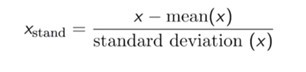

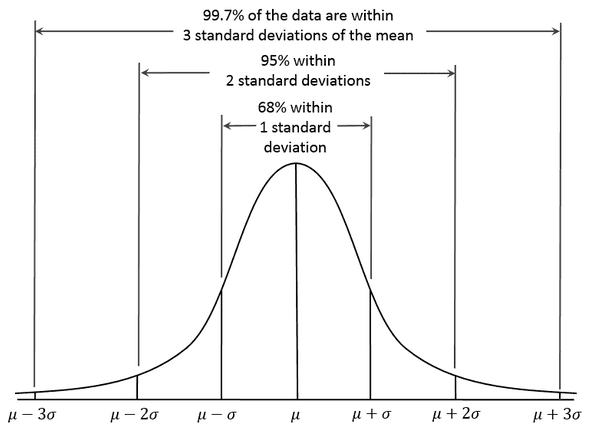

In [9]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [10]:
print(X_scaled)

[[-0.01043243  1.23702318 -0.01702738 ...  0.5745526   1.66820799
   0.89197181]
 [ 1.39747087  1.23702318 -0.01702738 ... -0.0087625  -0.996079
   0.54397387]
 [-0.01043243  0.00497963 -0.01702738 ...  1.27453072  0.33606449
  -0.152022  ]
 ...
 [-0.01043243 -1.22706392  1.3872586  ... -0.0087625  -0.996079
   0.19597594]
 [ 1.39747087  0.00497963 -0.01702738 ... -0.82540363  0.33606449
   1.23996975]
 [-0.01043243 -1.22706392 -1.42131337 ... -1.75870779 -0.996079
   0.89197181]]


In [11]:
X_scaled_df = pd.DataFrame(X_scaled)

In [12]:
print(X_scaled_df)

            0         1         2         3         4         5         6   \
0    -0.010432  1.237023 -0.017027  1.211542 -0.864322 -0.293201 -0.179661   
1     1.397471  1.237023 -0.017027 -0.010288  1.408283 -0.877438 -1.345850   
2    -0.010432  0.004980 -0.017027  1.211542  0.873552  0.291036 -0.412899   
3    -1.418336 -1.227064 -0.017027 -1.232118 -1.532735  0.875274 -1.462469   
4    -1.418336 -1.227064 -0.017027 -1.232118  0.606187  0.291036  1.453003   
...        ...       ...       ...       ...       ...       ...       ...   
2964 -1.418336  1.237023 -1.421313  1.211542 -0.864322 -0.293201  1.219765   
2965 -0.010432  0.004980 -0.017027 -1.232118 -0.329591  1.459511 -0.529518   
2966 -0.010432 -1.227064  1.387259  1.211542 -0.730639  0.291036 -1.229231   
2967  1.397471  0.004980 -0.017027  1.211542  0.606187 -0.877438  0.986528   
2968 -0.010432 -1.227064 -1.421313 -1.232118 -0.730639  1.459511 -0.529518   

            7         8         9         10  
0     1.011772  

In [13]:
# Define the dependant variable / target to predict 
#y_reg = data.nomad_score
y_reg = data.loc[:, ["groundSDA", "firstSDA", "groundASE", "firstASE"]].to_numpy()


In [14]:
#Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_reg, data, test_size = 0.2, random_state = 42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(2375, 11)
(594, 11)
(2375, 4)


Train model

In [16]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is R^2
print(model.score(X_test, y_test))

0.8038769825165051


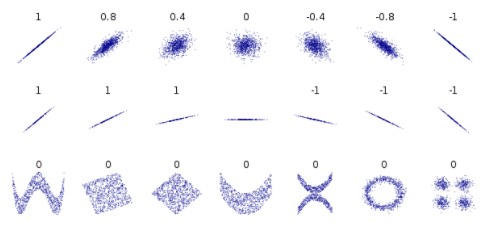

more info about the model class here https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
print("Coefficient", model.coef_, "intercetp",  model.intercept_)

Coefficient [[ 9.24139566e-02  2.56572692e-01  2.11930728e+00  8.91007810e-03
  -1.58645256e+01 -8.99108202e-01  2.20532490e-01 -1.13960875e-01
   1.43656468e+01 -1.61725063e-01 -1.87518827e+00]
 [ 9.67583032e-01 -1.10000568e-01  1.74585369e-01  1.13560190e-02
  -9.32947505e+00 -3.60694499e+00  2.49171951e-01  4.76092243e-01
  -8.17725667e-03  2.11262797e+00 -4.00842549e+00]
 [-7.54879435e-02 -5.38760663e-02  5.78534629e-01  4.68998026e-02
  -5.03596515e+00 -1.94906355e+00  1.60940477e-01 -1.53848853e-02
   4.09023434e+00 -8.90815160e-02 -1.35599597e+00]
 [ 1.01275522e+00 -1.05915925e-01 -6.36773797e-04 -2.54869712e-02
  -2.89786005e+00 -1.02265754e+00 -6.51885747e-02 -2.75041633e-01
   2.10793761e-02  4.20029694e-01 -1.43266315e+00]] intercetp [75.41315654 34.76009193 20.70264596 11.83282383]


In [18]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

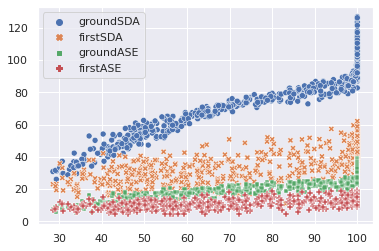

In [19]:
index = y_test[:, 0]
df_w = pd.DataFrame(y_pred, index, ["groundSDA", "firstSDA", "groundASE", "firstASE"])
sns.scatterplot(data=df_w)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


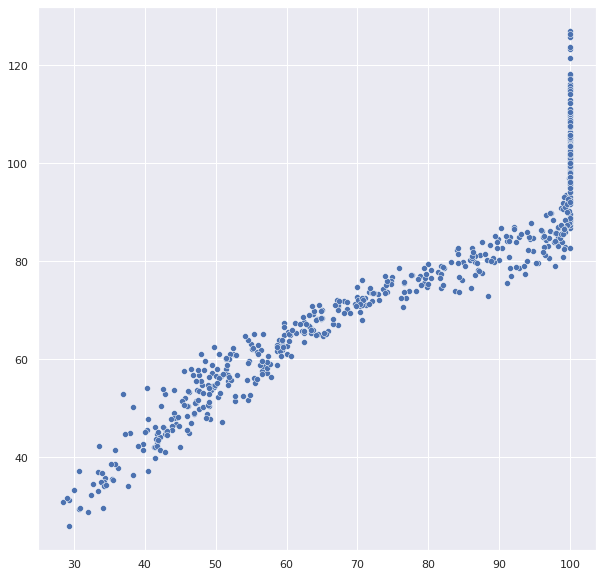

In [ ]:


#sns.scatterplot(y_test,y_pred)
y_test_1 = y_test[:, 0 ]
y_pred_1 = y_pred[:, 0]  
sns.scatterplot(y_test_1,y_pred_1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


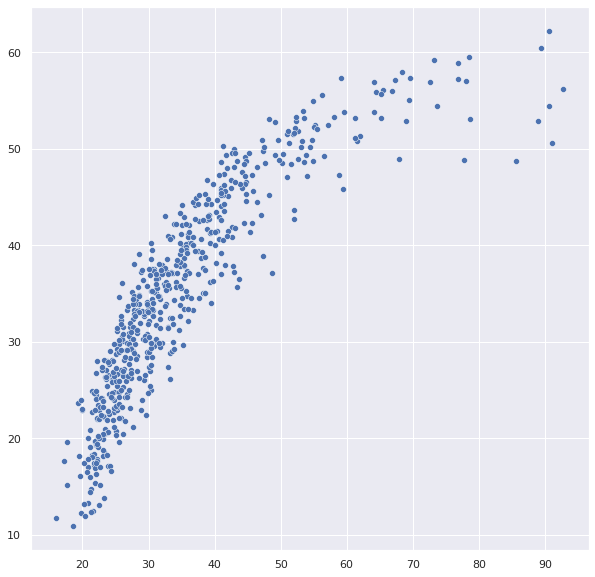

In [ ]:
y_test_2 = y_test[:, 1 ]
y_pred_2 = y_pred[:, 1]  
sns.scatterplot(y_test_2,y_pred_2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


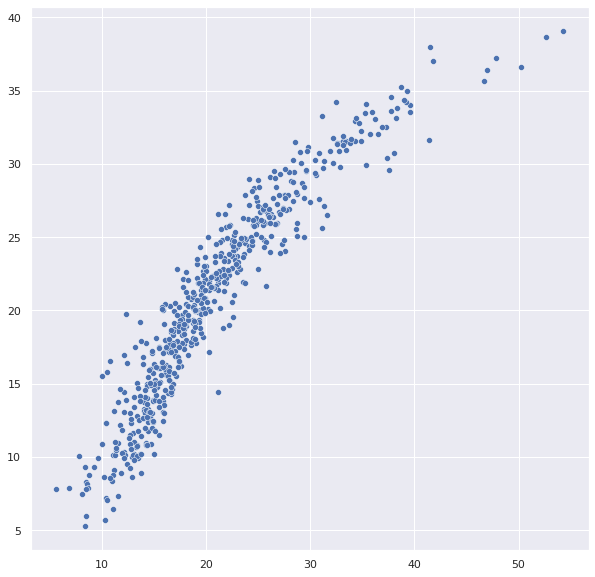

In [ ]:
y_test_3 = y_test[:, 2 ]
y_pred_3 = y_pred[:, 2]  
sns.scatterplot(y_test_3,y_pred_3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


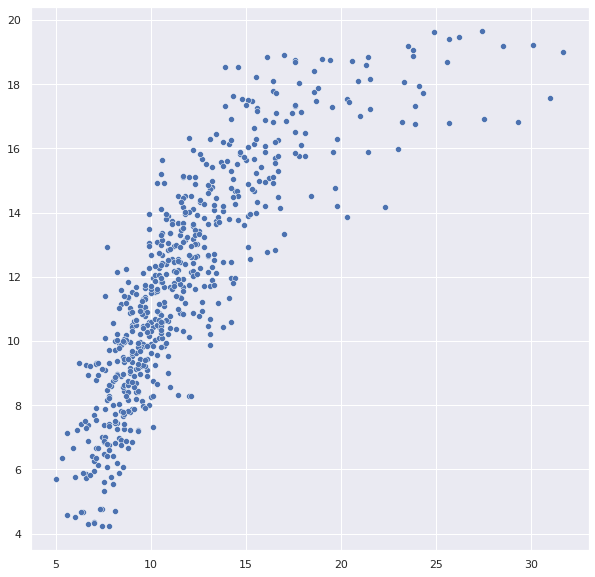

In [ ]:
y_test_4 = y_test[:, 3 ]
y_pred_4 = y_pred[:, 3]  
sns.scatterplot(y_test_4,y_pred_4)

In [ ]:
# We can also inspect our results visually

y_pred_train = model.predict(X_train)



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


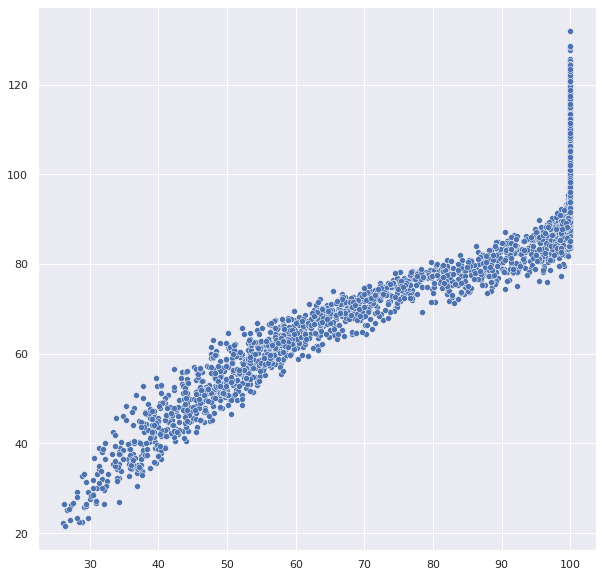

In [ ]:
y_train_1 = y_train[:, 0 ]
y_pred_train_1 = y_pred_train[:, 0 ]
sns.scatterplot(y_train_1,y_pred_train_1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


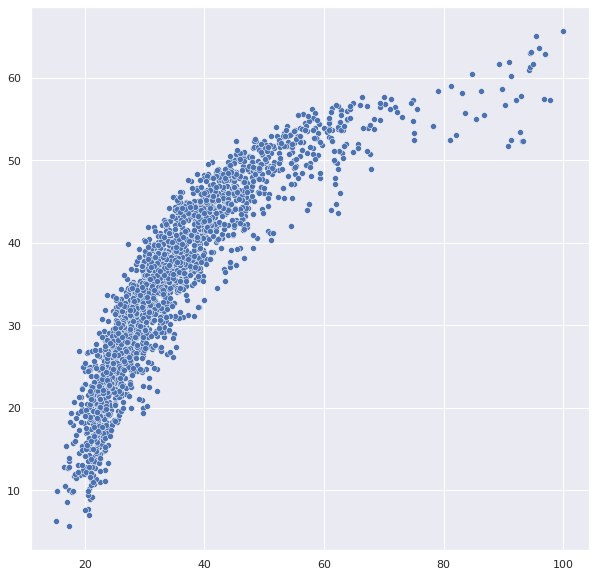

In [ ]:
y_train_2 = y_train[:, 1 ]
y_pred_train_2 = y_pred_train[:, 1 ]
sns.scatterplot(y_train_2,y_pred_train_2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


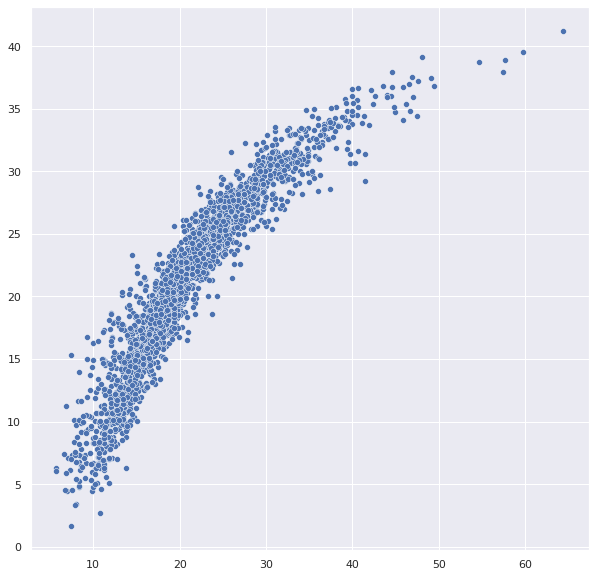

In [ ]:
y_train_3 = y_train[:, 2 ]
y_pred_train_3 = y_pred_train[:, 2 ]
sns.scatterplot(y_train_3,y_pred_train_3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


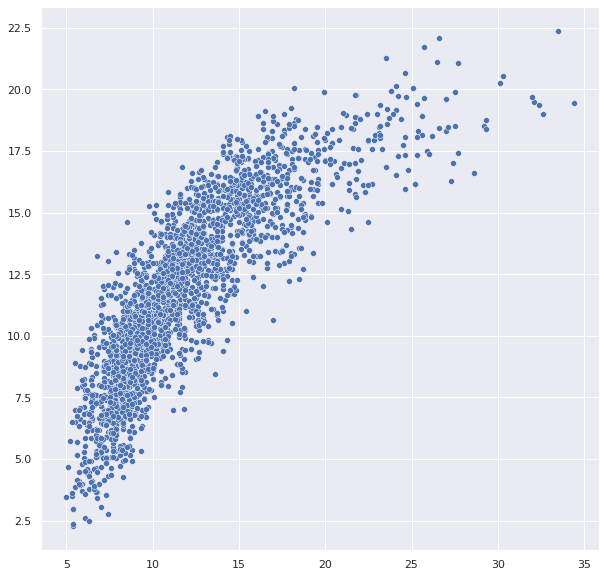

In [ ]:
y_train_4 = y_train[:, 3 ]
y_pred_train_4 = y_pred_train[:, 3 ]
sns.scatterplot(y_train_4,y_pred_train_4)

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 2421 to 1256
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   typicalFacadeGlazingRatio  594 non-null    float64
 1   typicalFacadeWindowWidth   594 non-null    int64  
 2   groundFacadeGlazingRatio   594 non-null    float64
 3   groundFacadeWindowWidth    594 non-null    int64  
 4   buildingDepth              594 non-null    int64  
 5   balconyWidth               594 non-null    int64  
 6   atriumArea                 594 non-null    int64  
 7   aspectRatio                594 non-null    float64
 8   groundFloorHeight          594 non-null    float64
 9   typicalfloorHeight         594 non-null    float64
 10  numberLevels               594 non-null    int64  
 11  groundSDA                  594 non-null    float64
 12  firstSDA                   594 non-null    float64
 13  groundASE                  594 non-null    flo

In [ ]:
''' data_test ['groundSDA _pred' ] = y_pred_1

alt.Chart(data_test).mark_circle(size=60).encode(
    x='groundSDA',
    y='groundSDA_pred',
    color=alt.Color('groundSDA', scale=alt.Scale(scheme='category10')),
    tooltip=['groundSDA', 'groundSDA_pred']
).interactive() '''

" data_test ['groundSDA _pred' ] = y_pred_1\n\nalt.Chart(data_test).mark_circle(size=60).encode(\n    x='groundSDA',\n    y='groundSDA_pred',\n    color=alt.Color('groundSDA', scale=alt.Scale(scheme='category10')),\n    tooltip=['groundSDA', 'groundSDA_pred']\n).interactive() "

Let's try a different model class

In [ ]:
# Import and instantiate a XGBoost Regressor
import xgboost as xgb
model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)



[18:16:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
X_test.shape

(594, 11)

In [ ]:
y_test.shape

(594, 4)

In [ ]:
X_test

In [ ]:
y_test


In [ ]:
model.fit(X_train, y_train)

[18:19:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
# checking error
predicted_y = model.predict(X_test)


In [ ]:
'''dt = DecisionTreeRegressor(max_depth= 10, random_state= 1, min_samples_leaf=.1)
y_pred = dt.predict(X_test)
mse(y_test, y_pred)'''

In [ ]:
#mean_squared_error(y_test, predicted_y)


In [ ]:

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test,y_test))

In [ ]:
X_test_1=X_test[:,10]
y_test_1=y_test[: ,3]

type(X_test_1)
type(y_test_1)

numpy.ndarray

In [ ]:
# Model performance on the test-set / This score is not accacy but a R^2
X_test_1=X_test[:,10]
y_test_1=y_test[: ,3]
print(model.score(X_test_1,y_test_1 ))

In [ ]:
X_test.shape

(594, 11)

In [ ]:
y_test.shape

(594, 4)

In [ ]:
X_test_1=X_test[ : , 10]
y_test_1= y_test[ : , 3]

In [ ]:
X_test_1

In [ ]:
y_test_1

In [ ]:
# Model performance on the test-set / This score is not accacy but a R^2


print(model.score(X_test_1, y_test_1))

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
'''data_test['nomad_score_predXG'] = y_pred

alt.Chart(data_test).mark_circle(size=60).encode(
    x='nomad_score',
    y='nomad_score_predXG',
    color=alt.Color('region', scale=alt.Scale(scheme='category10')),
    tooltip=['region','place']
).interactive()'''

alt.Chart(...)

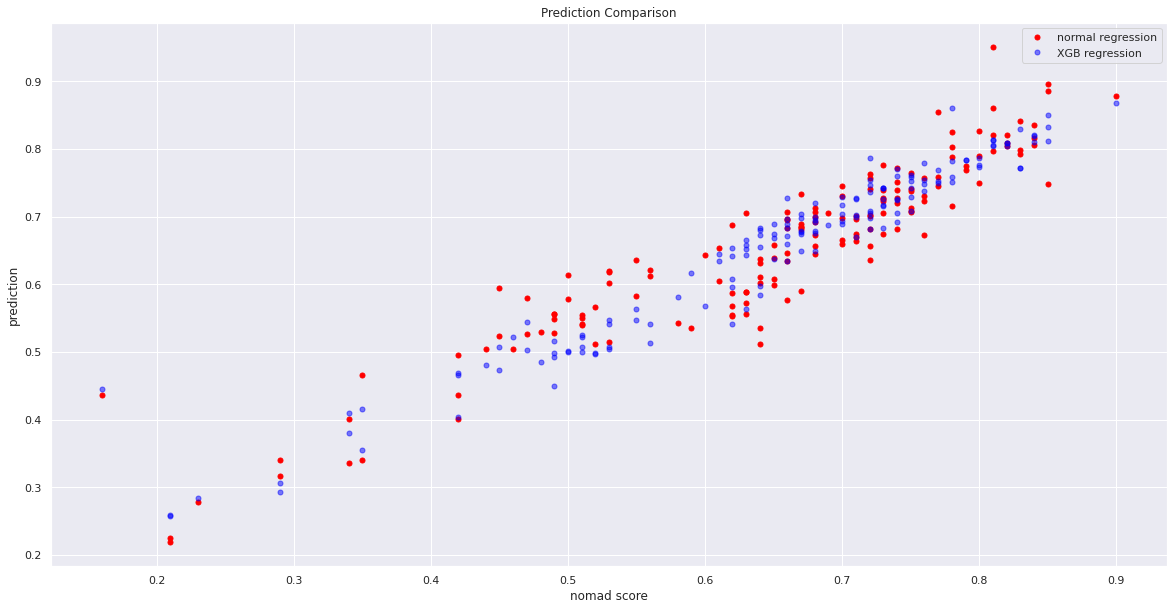

In [ ]:
#Comparative plot
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots()
ax1.plot(data_test["nomad_score"], data_test["nomad_score_pred"], color = "red", label = "normal regression",linestyle='None', marker = "o", markersize = 5)
ax1.plot(data_test["nomad_score"], data_test["nomad_score_predXG"], color = "blue", label = "XGB regression",linestyle='None',marker = "o", markersize = 5, alpha= 0.5)


ax1.set_xlabel('nomad score')
ax1.set_ylabel('prediction')
ax1.legend()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.title('Prediction Comparison')
plt.show()